In [1]:
from util import *

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']
Connected DB CINS_SMY - conn
Connected oraDW_ANALYTICS - conn_aly


In [2]:
cohort0_query = """WITH
T2 AS (
    SELECT * FROM CINS_TMP_ALY_CUST_SAMPLE1_SUB3),
T3 AS (
    SELECT *
    FROM DW_ANALYTICS.DW_CUST_PRODUCT_LOC_FCT
    WHERE SD_TKTT = 1),
T4 AS (
    SELECT T2.CUSTOMER_CDE, T3.PROCESS_DT AS RPT_DT,
        MAX(CASE
            WHEN T3.CUST_STATUS = 'HOAT DONG' THEN 2
            WHEN T3.CUST_STATUS = 'NGU DONG' THEN 1
            WHEN T3.CUST_STATUS = 'DONG BANG' THEN 0
        END) AS CUST_STT
    FROM T2 INNER JOIN T3 ON T2.CUSTOMER_CDE = T3.CUSTOMER_CDE
    WHERE PROCESS_DT = TO_DATE('31-12-2022', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-01-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('28-02-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-03-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-04-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-05-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-06-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-07-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-08-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-09-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-10-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('30-11-2023', 'DD-MM-YY')
    OR PROCESS_DT = TO_DATE('31-12-2023', 'DD-MM-YY')
    GROUP BY T2.CUSTOMER_CDE, T3.PROCESS_DT),
T5 AS (
    SELECT CUSTOMER_CDE, 
    -- RPT_DT
    LAG(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG9,
    LAG(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG8,
    LAG(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG7,
    LAG(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG6,
    LAG(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG5,
    LAG(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG4,
    LAG(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG3,
    LAG(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG2,
    LAG(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LAG1,
    RPT_DT, 
    LEAD(RPT_DT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD1, 
    LEAD(RPT_DT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD2,
    LEAD(RPT_DT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD3,
    LEAD(RPT_DT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD4,
    LEAD(RPT_DT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD5,
    LEAD(RPT_DT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD6,
    LEAD(RPT_DT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD7,
    LEAD(RPT_DT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD8,
    LEAD(RPT_DT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS RPT_DT_LEAD9,
    -- STATUS
    LAG(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG9,
    LAG(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG8,
    LAG(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG7,
    LAG(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG6,
    LAG(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG5,
    LAG(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG4,
    LAG(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG3,
    LAG(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG2,
    LAG(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LAG1,
    CUST_STT, 
    LEAD(CUST_STT, 1) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD1,
    LEAD(CUST_STT, 2) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD2,
    LEAD(CUST_STT, 3) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD3,
    LEAD(CUST_STT, 4) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD4,
    LEAD(CUST_STT, 5) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD5,
    LEAD(CUST_STT, 6) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD6,
    LEAD(CUST_STT, 7) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD7,
    LEAD(CUST_STT, 8) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD8,
    LEAD(CUST_STT, 9) OVER (PARTITION BY CUSTOMER_CDE ORDER BY RPT_DT) AS CUST_STT_LEAD9
    FROM T4
),
T6 AS (
    SELECT * FROM T5
    WHERE RPT_DT = TO_DATE('31-07-2023', 'DD-MM-YY'))
SELECT * 
FROM T6"""

In [3]:
cohort0 = download_or_reload('data/COHORT_0', cohort0_query)

Len 258904


In [4]:
cohort0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258904 entries, 0 to 258903
Data columns (total 39 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   CUSTOMER_CDE    258904 non-null  object        
 1   RPT_DT_LAG9     0 non-null       object        
 2   RPT_DT_LAG8     0 non-null       object        
 3   RPT_DT_LAG7     255477 non-null  datetime64[ns]
 4   RPT_DT_LAG6     255881 non-null  datetime64[ns]
 5   RPT_DT_LAG5     256355 non-null  datetime64[ns]
 6   RPT_DT_LAG4     256908 non-null  datetime64[ns]
 7   RPT_DT_LAG3     257383 non-null  datetime64[ns]
 8   RPT_DT_LAG2     257849 non-null  datetime64[ns]
 9   RPT_DT_LAG1     258430 non-null  datetime64[ns]
 10  RPT_DT          258904 non-null  datetime64[ns]
 11  RPT_DT_LEAD1    258845 non-null  datetime64[ns]
 12  RPT_DT_LEAD2    258788 non-null  datetime64[ns]
 13  RPT_DT_LEAD3    258699 non-null  datetime64[ns]
 14  RPT_DT_LEAD4    258548 non-null  dat

In [5]:
cohort0

,CUSTOMER_CDE,RPT_DT_LAG9,RPT_DT_LAG8,RPT_DT_LAG7,RPT_DT_LAG6,RPT_DT_LAG5,RPT_DT_LAG4,RPT_DT_LAG3,RPT_DT_LAG2,RPT_DT_LAG1,...,CUST_STT,CUST_STT_LEAD1,CUST_STT_LEAD2,CUST_STT_LEAD3,CUST_STT_LEAD4,CUST_STT_LEAD5,CUST_STT_LEAD6,CUST_STT_LEAD7,CUST_STT_LEAD8,CUST_STT_LEAD9
0,10000094,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,2,2.0,2.0,2.0,2.0,2.0,None,None,None,None
1,10000397,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,2,2.0,2.0,2.0,2.0,2.0,None,None,None,None
2,1000055,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,2,2.0,2.0,2.0,2.0,2.0,None,None,None,None
3,10000601,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,2,2.0,2.0,2.0,2.0,2.0,None,None,None,None
4,10000686,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258899,9999379,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,2,2.0,2.0,2.0,2.0,2.0,None,None,None,None
258900,9999460,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,2,2.0,2.0,2.0,2.0,2.0,None,None,None,None
258901,9999478,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,2,2.0,2.0,2.0,2.0,2.0,None,None,None,None
258902,9999496,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,2,2.0,2.0,2.0,2.0,2.0,None,None,None,None


Filter Customer who not active in the previous month

In [6]:
cohort0['CUST_STT_LAG1'].value_counts()

2.0    231209
1.0     21677
0.0      5544
Name: CUST_STT_LAG1, dtype: int64

In [7]:
cohort0['CUST_STT'].value_counts()

2    231629
1     21651
0      5624
Name: CUST_STT, dtype: int64

In [8]:
cohort0 = cohort0[(cohort0['CUST_STT_LAG1']<2) | (cohort0['CUST_STT_LAG1'].isnull())]

In [9]:
cohort0

,CUSTOMER_CDE,RPT_DT_LAG9,RPT_DT_LAG8,RPT_DT_LAG7,RPT_DT_LAG6,RPT_DT_LAG5,RPT_DT_LAG4,RPT_DT_LAG3,RPT_DT_LAG2,RPT_DT_LAG1,...,CUST_STT,CUST_STT_LEAD1,CUST_STT_LEAD2,CUST_STT_LEAD3,CUST_STT_LEAD4,CUST_STT_LEAD5,CUST_STT_LEAD6,CUST_STT_LEAD7,CUST_STT_LEAD8,CUST_STT_LEAD9
4,10000686,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
5,10000694,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
10,10001036,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
11,10001049,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
12,10001050,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258867,9997543,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,1,1.0,2.0,2.0,2.0,2.0,None,None,None,None
258869,9997548,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,1,1.0,1.0,1.0,1.0,1.0,None,None,None,None
258888,9998509,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,1,1.0,1.0,1.0,1.0,1.0,None,None,None,None
258894,9999010,None,None,2022-12-31,2023-01-31,2023-02-28,2023-03-31,2023-04-30,2023-05-31,2023-06-30,...,1,1.0,1.0,1.0,1.0,1.0,None,None,None,None


In [10]:
cohort0['CUST_STT'].value_counts(), cohort0['CUST_STT'].value_counts(normalize=True)

(1    21395
 0     5624
 2      676
 Name: CUST_STT, dtype: int64,
 1    0.772522
 0    0.203069
 2    0.024409
 Name: CUST_STT, dtype: float64)

In [11]:
score = []
for i, r in cohort0.iterrows():
    x = r[['CUST_STT', 'CUST_STT_LEAD1', 'CUST_STT_LEAD2', 'CUST_STT_LEAD3', 'CUST_STT_LEAD4', 'CUST_STT_LEAD5',
    'CUST_STT_LEAD6', 'CUST_STT_LEAD7', 'CUST_STT_LEAD8', 'CUST_STT_LEAD9']].values
    total_active = (x == 2).sum()
    score.append(total_active)
    

In [12]:
cohort0['SCORE'] = score

In [13]:
# shuffle to get random
# cohort0 = cohort0.sample(frac=1)

In [14]:
# cohort0 = cohort0.sort_values(by='SCORE', ascending=False)

In [15]:
def analyze_cohort(cohort):
    len_cohort = len(cohort)
    data = []
    num_react = len(cohort[cohort['CUST_STT'] == 2])
    rpt_dt = cohort['RPT_DT'].tolist()[0]
    cohort = cohort[cohort['CUST_STT'] != 2]
    len_not_react = len(cohort)
    data.append((rpt_dt,num_react, len_not_react))
    if len(cohort) > 0:
        for i in range(1,10):
            if len(cohort) > 0:
                lead_mth = f'CUST_STT_LEAD{i}'
                num_react = len(cohort[cohort[lead_mth] == 2])
                rpt_dt = cohort[f'RPT_DT_LEAD{i}'].tolist()[0]
                cohort = cohort[cohort[lead_mth] != 2]
                len_not_react = len(cohort)
                data.append((rpt_dt,num_react, len_not_react))
    res_df = pd.DataFrame(data=data, columns=['RPT_DT', 'NUM_REACT', 'NUM_NOT_REACT'])
    res_df['PERC_REACT_PREV_MOB'] = res_df['NUM_REACT'].shift(-1) / res_df['NUM_NOT_REACT']
    res_df['PERC_REACT_PREV_MOB'] = res_df['PERC_REACT_PREV_MOB'].shift()
    res_df['CUMSUM'] = res_df['NUM_REACT'].cumsum()
    res_df['PERC'] = res_df['CUMSUM'] / len_cohort
    res_df = res_df[res_df['RPT_DT'].notnull()]
    ax = sns.barplot(res_df, x='RPT_DT', y='NUM_REACT')
    sns.lineplot(res_df['CUMSUM'], ax=ax)
    plt.show()
    return res_df

In [16]:
cohort0['SCORE'].value_counts().sort_index()

0    24364
1      180
2     1390
3      490
4      293
5      312
6      666
Name: SCORE, dtype: int64

In [17]:
cohort0['SCORE'].value_counts().sort_index()[1:].sum()

3331

In [18]:
3331 / len(cohort0)

0.12027441776493952

5000


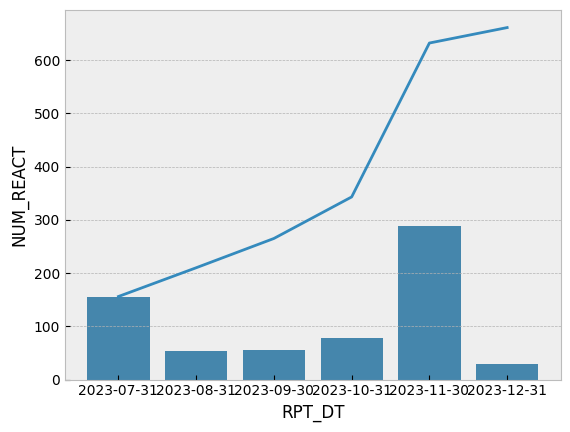

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-07-31,156,4844,NaN,156,0.0312
1,2023-08-31,54,4790,0.011148,210,0.0420
2,2023-09-30,55,4735,0.011482,265,0.0530
3,2023-10-31,78,4657,0.016473,343,0.0686
4,2023-11-30,289,4368,0.062057,632,0.1264
5,2023-12-31,29,4339,0.006639,661,0.1322


10000


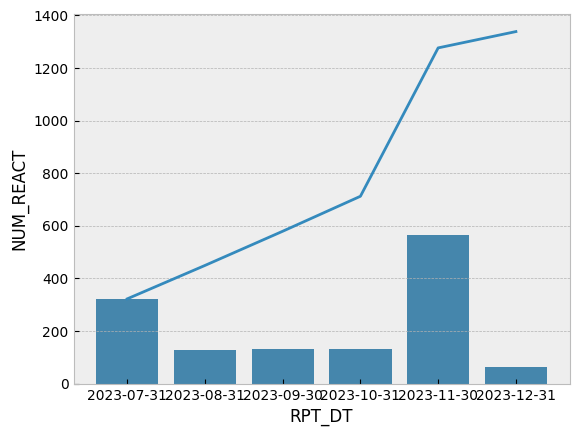

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-07-31,322,9678,NaN,322,0.0322
1,2023-08-31,127,9551,0.013123,449,0.0449
2,2023-09-30,130,9421,0.013611,579,0.0579
3,2023-10-31,133,9288,0.014117,712,0.0712
4,2023-11-30,564,8724,0.060724,1276,0.1276
5,2023-12-31,62,8662,0.007107,1338,0.1338


20000


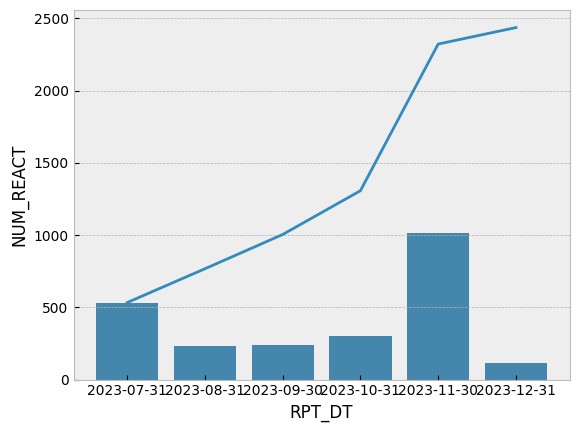

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-07-31,533,19467,NaN,533,0.02665
1,2023-08-31,234,19233,0.012020,767,0.03835
2,2023-09-30,237,18996,0.012323,1004,0.05020
3,2023-10-31,303,18693,0.015951,1307,0.06535
4,2023-11-30,1015,17678,0.054298,2322,0.11610
5,2023-12-31,114,17564,0.006449,2436,0.12180


30000


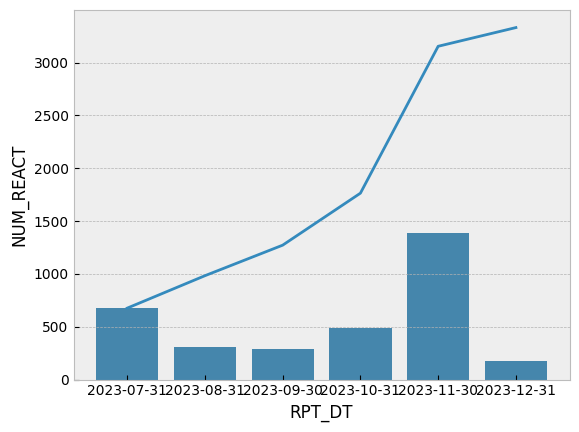

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-07-31,676,27019,NaN,676,0.024409
1,2023-08-31,307,26712,0.011362,983,0.035494
2,2023-09-30,289,26423,0.010819,1272,0.045929
3,2023-10-31,492,25931,0.018620,1764,0.063694
4,2023-11-30,1390,24541,0.053604,3154,0.113883
5,2023-12-31,177,24364,0.007212,3331,0.120274


50000


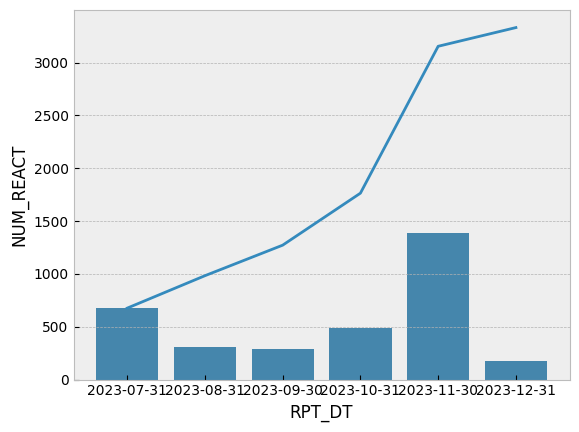

,RPT_DT,NUM_REACT,NUM_NOT_REACT,PERC_REACT_PREV_MOB,CUMSUM,PERC
0,2023-07-31,676,27019,NaN,676,0.024409
1,2023-08-31,307,26712,0.011362,983,0.035494
2,2023-09-30,289,26423,0.010819,1272,0.045929
3,2023-10-31,492,25931,0.018620,1764,0.063694
4,2023-11-30,1390,24541,0.053604,3154,0.113883
5,2023-12-31,177,24364,0.007212,3331,0.120274


In [19]:
for limit in [5000, 10000, 20000, 30000, 50000]:
    print(limit)
    res_df = analyze_cohort(cohort0[:limit])
    display(res_df)